In [1]:
import pandas as pd
#from pandas_datareader import data as pdr
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from scipy.optimize import leastsq
import statsmodels.regression.linear_model as sm
from scipy.optimize import leastsq
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from statsmodels.tsa.arima.model import ARIMA
import functools
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import CLA
import pypfopt

In [2]:
def generate_csv(symbol,filename):
    current_date=datetime.datetime.now()
    start_date=datetime.datetime(current_date.year-2,1,1)
    df = pdr.get_data_yahoo(symbol,start_date,current_date).reset_index()
    df.to_csv(filename)

In [3]:
all_url = "ALL.csv"
lmt_url = "LMT.csv"
bhp_url="BHP.csv"
exr_url="EXR.csv"
xom_url="XOM.csv"
duk_url="DUK.csv"

In [4]:
all_df=pd.read_csv(all_url,parse_dates=['Date'],index_col='Date')
lmt_df =pd.read_csv(lmt_url,parse_dates=['Date'],index_col='Date')
bhp_df =pd.read_csv(bhp_url,parse_dates=['Date'],index_col='Date')
exr_df =pd.read_csv(exr_url,parse_dates=['Date'],index_col='Date')
xom_df =pd.read_csv(xom_url,parse_dates=['Date'],index_col='Date')
duk_df =pd.read_csv(duk_url,parse_dates=['Date'],index_col='Date')

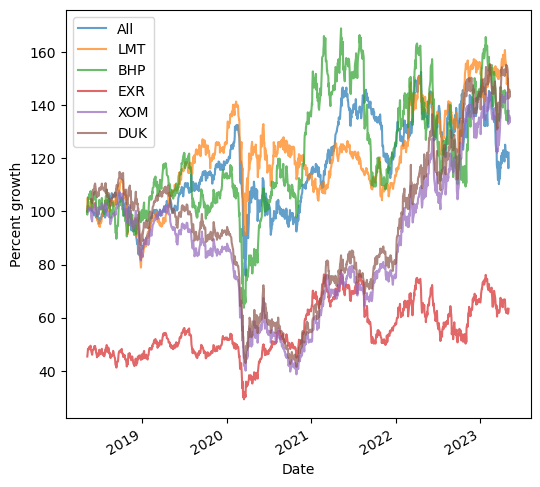

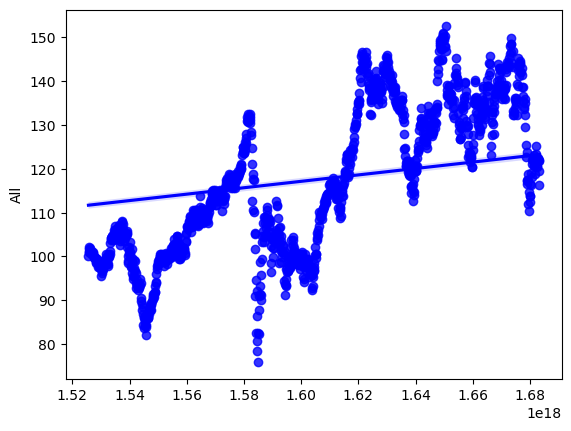

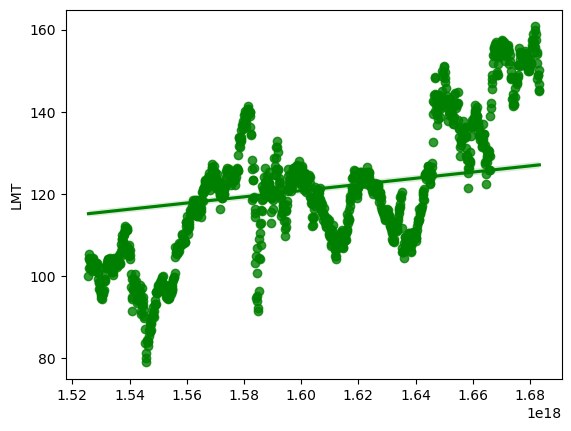

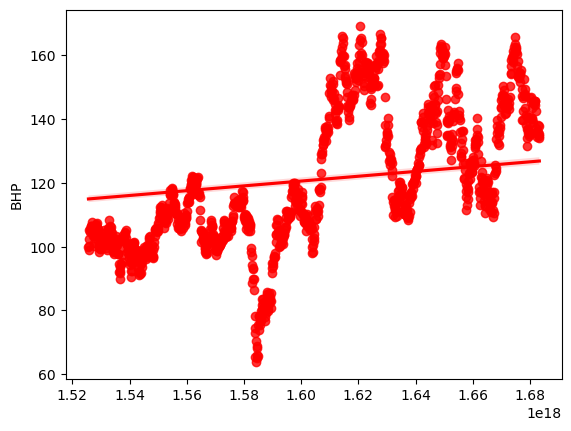

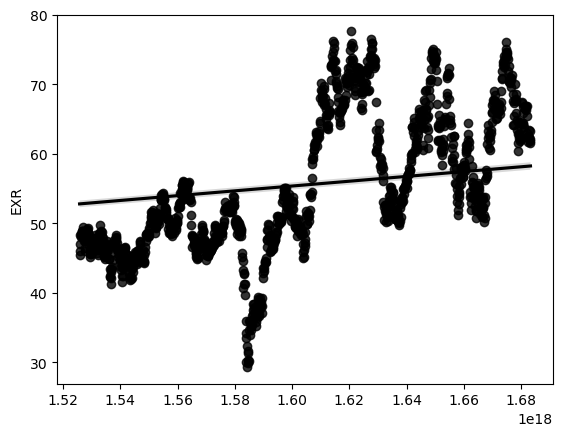

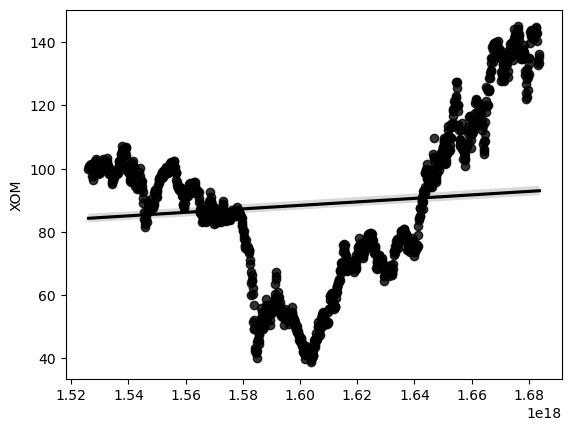

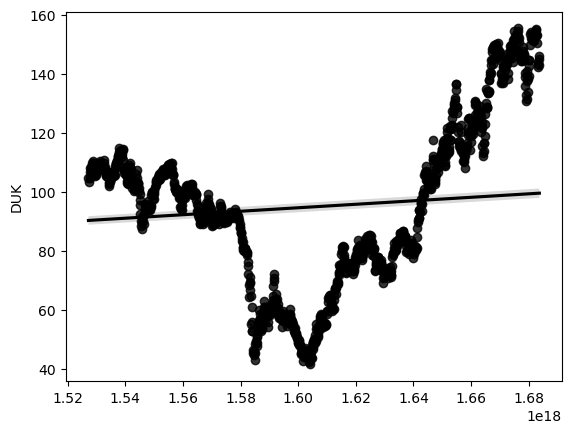

In [5]:
fig,ax=plt.subplots(figsize=(6,6))
all_df['All']=all_df['Open'].div(all_df['Open'].iloc[0]).mul(100)
all_df['All'].plot(ax=ax,alpha=.7)
lmt_df['LMT']=lmt_df['Open'].div(lmt_df['Open'].iloc[0]).mul(100)
lmt_df['LMT'].plot(ax=ax,alpha=.7)
bhp_df['BHP']=bhp_df['Open'].div(bhp_df['Open'].iloc[0]).mul(100)
bhp_df['BHP'].plot(ax=ax,alpha=.7)
exr_df['EXR']=bhp_df['Open'].div(exr_df['Open'].iloc[0]).mul(100)
exr_df['EXR'].plot(ax=ax,alpha=.7)
xom_df['XOM']=xom_df['Open'].div(xom_df['Open'].iloc[0]).mul(100)
xom_df['XOM'].plot(ax=ax,alpha=.7)
duk_df['DUK']=xom_df['Open'].div(duk_df['Open'].iloc[0]).mul(100)
duk_df['DUK'].plot(ax=ax,alpha=.7)


plt.ylabel("Percent growth")
plt.legend()
plt.show()

sns.regplot(x=np.asarray(all_df.index).astype(float),y="All",data=all_df,color='blue')
plt.show()
sns.regplot(x=np.asarray(lmt_df.index).astype(float),y="LMT",data=lmt_df,color='green')
plt.show()
sns.regplot(x=np.asarray(bhp_df.index).astype(float),y="BHP",data=bhp_df,color='red')
plt.show()
sns.regplot(x=np.asarray(exr_df.index).astype(float),y="EXR",data=exr_df,color='black')
plt.show()
sns.regplot(x=np.asarray(xom_df.index).astype(float),y="XOM",data=xom_df,color='black')
plt.show()
sns.regplot(x=np.asarray(duk_df.index).astype(float),y="DUK",data=duk_df,color='black')
plt.show()


In [6]:
all_dividend_df=pd.read_csv('all_dividends.csv',parse_dates=['Date'],index_col='Date')
lmt_dividend_df=pd.read_csv('lmt_dividends.csv',parse_dates=['Date'],index_col='Date')
bhp_dividend_df=pd.read_csv('bhp_dividends.csv',parse_dates=['Date'],index_col='Date')
exr_dividend_df=pd.read_csv('exr_dividends.csv',parse_dates=['Date'],index_col='Date')
xom_dividend_df=pd.read_csv('xom_dividends.csv',parse_dates=['Date'],index_col='Date')
duk_dividend_df=pd.read_csv('duk_dividends.csv',parse_dates=['Date'],index_col='Date')

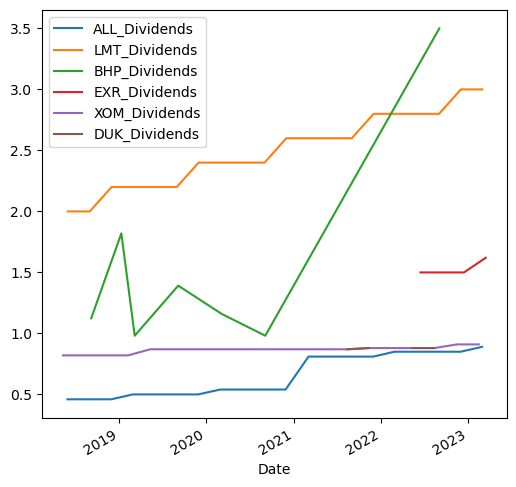

In [7]:
fig,ax=plt.subplots(figsize=(6,6))

all_dividend_df['ALL_Dividends']=all_dividend_df['Dividends'].astype(float)
lmt_dividend_df['LMT_Dividends']=lmt_dividend_df['Dividends'].astype(float)
bhp_dividend_df['BHP_Dividends']=bhp_dividend_df['Dividends'].astype(float)
exr_dividend_df['EXR_Dividends']=exr_dividend_df['Dividends'].astype(float)
xom_dividend_df['XOM_Dividends']=xom_dividend_df['Dividends'].astype(float)
duk_dividend_df['DUK_Dividends']=xom_dividend_df['Dividends'].astype(float)
all_dividend_df['ALL_Dividends'].plot(ax=ax)
lmt_dividend_df['LMT_Dividends'].plot(ax=ax)
bhp_dividend_df['BHP_Dividends'].plot(ax=ax)
exr_dividend_df['EXR_Dividends'].plot(ax=ax)
xom_dividend_df['XOM_Dividends'].plot(ax=ax)
duk_dividend_df['DUK_Dividends'].plot(ax=ax)
#plt.legend()
plt.legend()
plt.show()


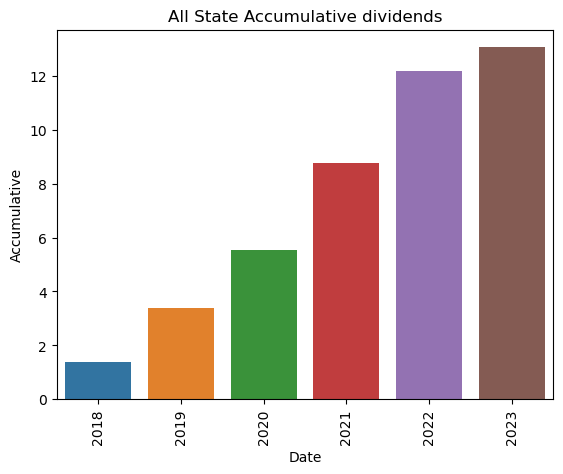

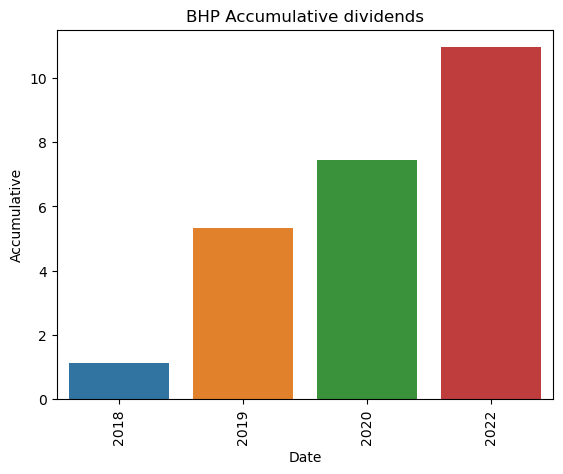

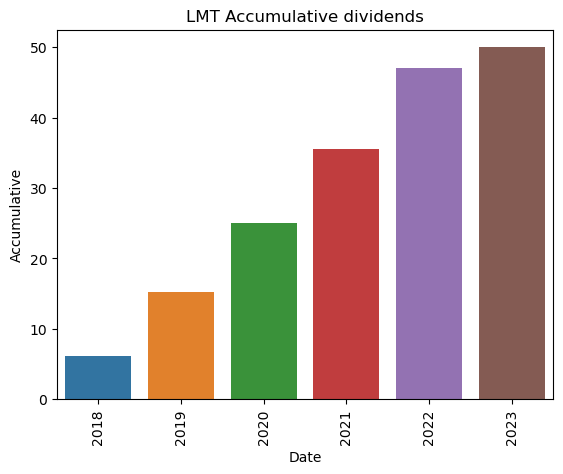

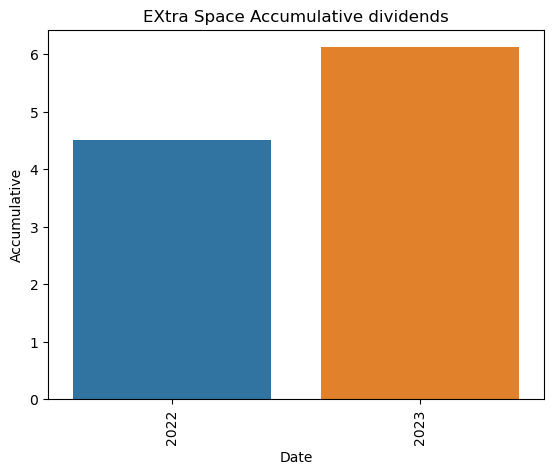

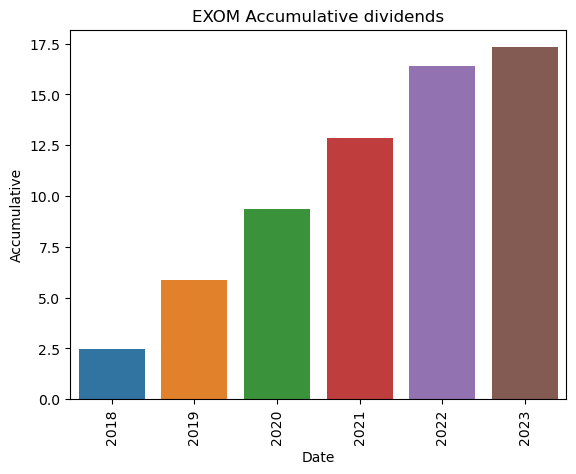

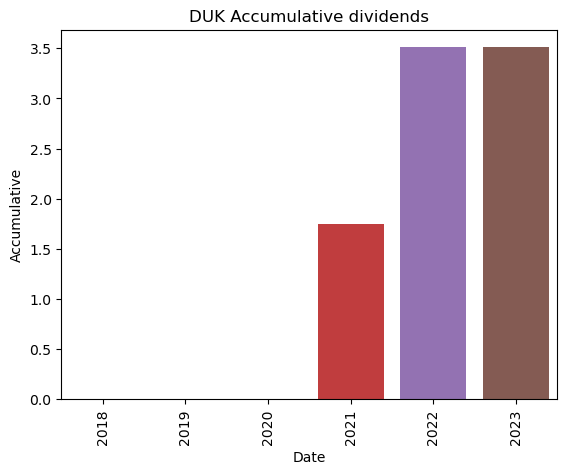

In [8]:
def PlotBarPlot(df,column_name,title):
    months=df.index.month
    years=df.index.year
    grouped=df.groupby([years,months])[column_name].sum()
    grouped=grouped.unstack()

    fp=df.pivot_table(index=df.index.year,columns=df.index.month,values=[column_name],aggfunc='sum')
    fp['Totals'] = fp.sum(axis='columns')
    fp['Accumulative']=fp['Totals'].cumsum()

    sns.barplot(x=fp.index,y=fp['Accumulative'])
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    
PlotBarPlot(all_dividend_df,'ALL_Dividends','All State Accumulative dividends')
PlotBarPlot(bhp_dividend_df,'BHP_Dividends','BHP Accumulative dividends')
PlotBarPlot(lmt_dividend_df,'LMT_Dividends','LMT Accumulative dividends')
PlotBarPlot(exr_dividend_df,'EXR_Dividends','EXtra Space Accumulative dividends')
PlotBarPlot(xom_dividend_df,'XOM_Dividends','EXOM Accumulative dividends')
PlotBarPlot(duk_dividend_df,'DUK_Dividends','DUK Accumulative dividends')
#print(fp)

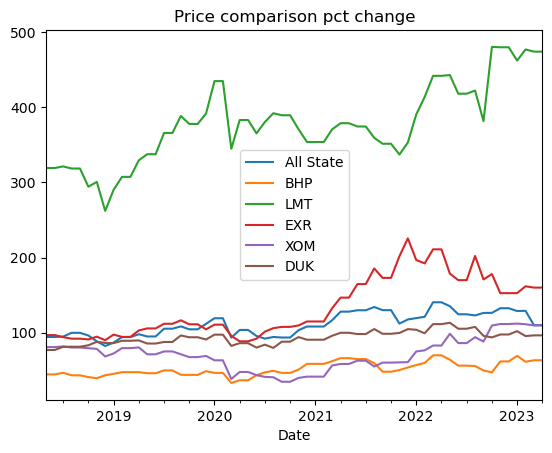

In [9]:
def stock_price_by_pct_chg(df):

    first_price=df['Open'].iloc[0]
    returns=df['Open'].pct_change()
    returns_plus_one = returns.add(1)
    accumulative=returns_plus_one.cumprod()
    accumulative=accumulative.mul(first_price)
    return accumulative

#first_price=all_df['Open'].iloc[0]
#allstate_returns=all_df['Open'].pct_change()
#allstate_returns_plus_one = allstate_returns.add(1)
#allstate_accumulative=allstate_returns_plus_one.cumprod()

#allstate_accumulative=allstate_accumulative.mul(first_price)

allstate_accumulative=stock_price_by_pct_chg(all_df)
bhp_accumulative=stock_price_by_pct_chg(bhp_df)
lmt_accumulative=stock_price_by_pct_chg(lmt_df)
exr_accumulative=stock_price_by_pct_chg(exr_df)
xom_accumulative=stock_price_by_pct_chg(xom_df)
duk_accumulative=stock_price_by_pct_chg(duk_df)

allstate_accumulative.asfreq('M').ffill().plot(label='All State')
bhp_accumulative.asfreq('M').ffill().plot(label='BHP')
lmt_accumulative.asfreq('M').ffill().plot(label='LMT')
exr_accumulative.asfreq('M').ffill().plot(label='EXR')
xom_accumulative.asfreq('M').ffill().plot(label='XOM')
duk_accumulative.asfreq('M').ffill().plot(label='DUK')
plt.title('Price comparison pct change' )
plt.legend()
plt.show()

In [10]:
portfolio_returns_all=all_df.resample('Q')['Open'].mean().reset_index().rename(columns={"Open": "ALL"})
portfolio_returns_bhp=bhp_df.resample('Q')['Open'].mean().reset_index().rename(columns={"Open": "BHP"})
portfolio_returns_lmt=lmt_df.resample('Q')['Open'].mean().reset_index().rename(columns={"Open": "LMT"})
portfolio_returns_exr=exr_df.resample('Q')['Open'].mean().reset_index().rename(columns={"Open": "EXR"})
portfolio_returns_xom=xom_df.resample('Q')['Open'].mean().reset_index().rename(columns={"Open": "XOM"})
portfolio_returns_duk=duk_df.resample('Q')['Open'].mean().reset_index().rename(columns={"Open": "DUK"})

dfs=[portfolio_returns_all,portfolio_returns_bhp,portfolio_returns_lmt,portfolio_returns_exr,portfolio_returns_xom,portfolio_returns_duk]

prices=pd.concat(dfs, axis=1)   

occurrences=len(prices)
#print(occurrences)

#print(type(prices))

prices = functools.reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
prices=pd.DataFrame(prices)
prices.set_index("Date",inplace=True)
#print(prices)

cs = CovarianceShrinkage(prices)
sample_cov = prices.pct_change().cov() * occurrences
e_cov = cs.ledoit_wolf()

print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")

ef=pypfopt.efficient_frontier.EfficientFrontier(None, e_cov)
min_vol_weights=ef.min_volatility()
print("Percentage to be held in the portfolio in the period", min_vol_weights)


Sample Covariance Matrix
           ALL       BHP       LMT       EXR       XOM       DUK
ALL  0.118199  0.084118  0.061497  0.050521  0.106728  0.034689
BHP  0.084118  0.314611  0.045332  0.012367  0.180912  0.005300
LMT  0.061497  0.045332  0.120259 -0.004972  0.056570  0.004966
EXR  0.050521  0.012367 -0.004972  0.200986  0.017920  0.054430
XOM  0.106728  0.180912  0.056570  0.017920  0.430526 -0.003517
DUK  0.034689  0.005300  0.004966  0.054430 -0.003517  0.062814 

Efficient Covariance Matrix
           ALL       BHP       LMT       EXR       XOM       DUK
ALL  1.836985  0.499889  0.365457  0.300231  0.634255  0.206146
BHP  0.499889  3.004211  0.269399  0.073495  1.075108  0.031499
LMT  0.365457  0.269399  1.849231 -0.029545  0.336178  0.029512
EXR  0.300231  0.073495 -0.029545  2.328968  0.106497  0.323463
XOM  0.634255  1.075108  0.336178  0.106497  3.693061 -0.020903
DUK  0.206146  0.031499  0.029512  0.323463 -0.020903  1.507847 

Percentage to be held in the portfolio in the

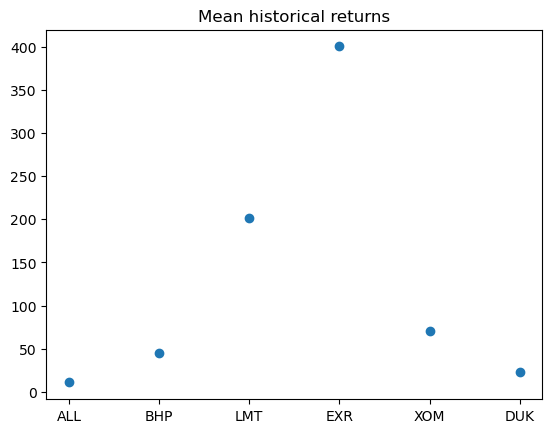

In [11]:
mean_returns=mean_historical_return(prices,frequency=252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.title("Mean historical returns")
plt.show()

Constrained Line Algorithm (CLA) class: generates the entire efficient frontier
1. requires covariance matrix of returns
2. requires proxy for expected future returns: mean historical returns
The expected return is the profit or loss that an investor anticipates on an investment that has known historical rates of return (RoR).


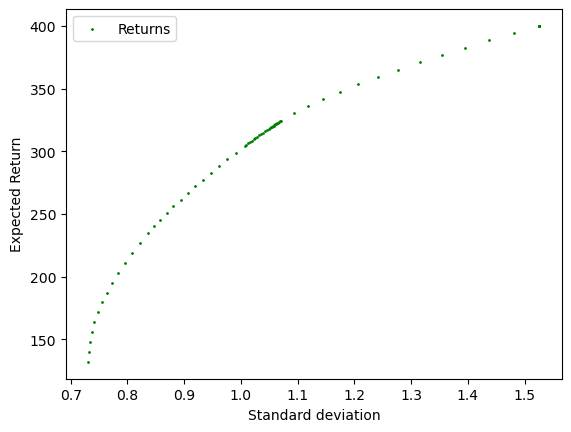

In [12]:
print("Constrained Line Algorithm (CLA) class: generates the entire efficient frontier")
print("1. requires covariance matrix of returns")
print("2. requires proxy for expected future returns: mean historical returns")
print("The expected return is the profit or loss that an investor anticipates on an investment that has known historical rates of return (RoR).")
    
cla=CLA(mean_returns,e_cov)

(ret, vol, weights) = cla.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'Returns')
plt.xlabel('Standard deviation')
plt.ylabel('Expected Return')
plt.legend()
plt.show()


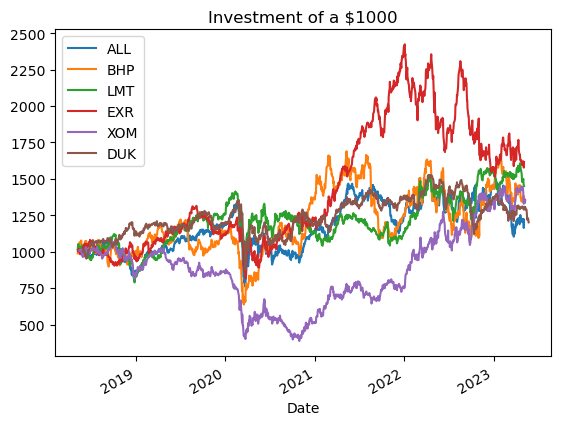

In [13]:
investment=1000
def PlotInvestment(input_df,label):
    df_returns=input_df['Open'].pct_change()
    df_returns_plus_one = df_returns.add(1)
    df_cumulative_return = df_returns_plus_one.cumprod()
    df_cumulative_return.mul(investment).plot(label=label)
    
PlotInvestment(all_df,"ALL")
PlotInvestment(bhp_df,"BHP")
PlotInvestment(lmt_df,"LMT")
PlotInvestment(exr_df,"EXR")
PlotInvestment(xom_df,"XOM")
PlotInvestment(duk_df,"DUK")

plt.title("Investment of a $1000")
plt.legend()
plt.show()

#sns.regplot(x=np.asarray(df_cumulative_return.index).astype(float),y=df_cumulative_return,color='blue')
#plt.ylabel("Percent growth")
#plt.title("All State")
#plt.show()

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


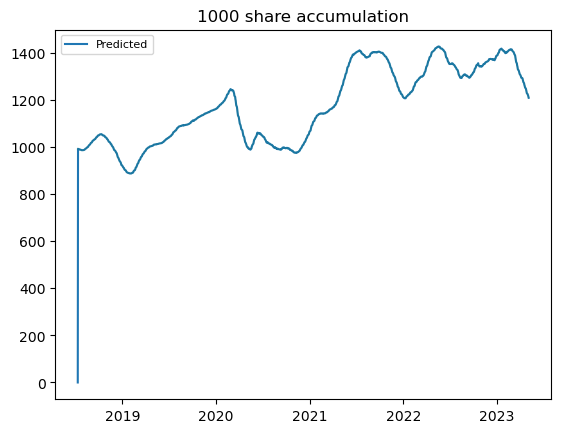

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


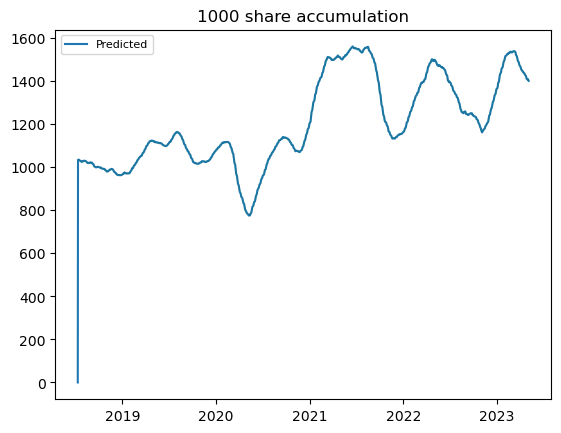

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


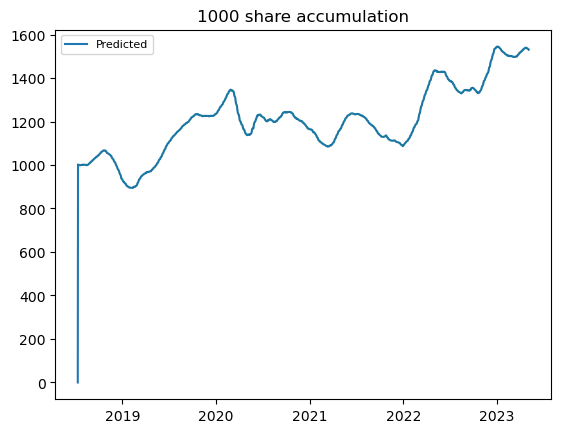

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


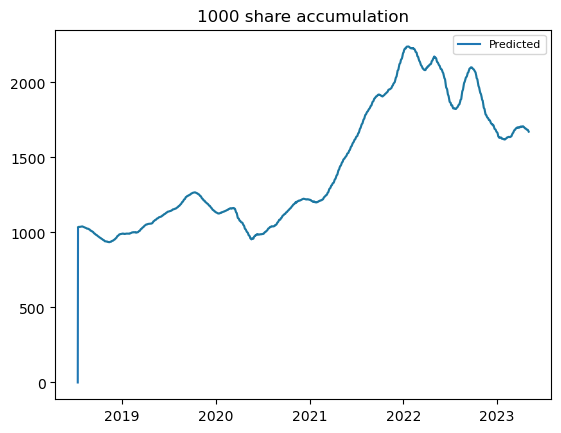

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


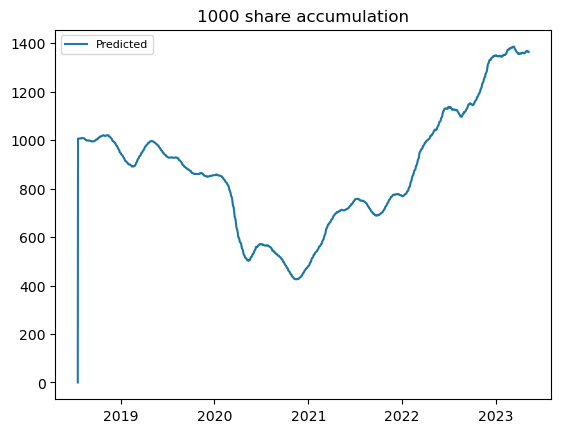

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


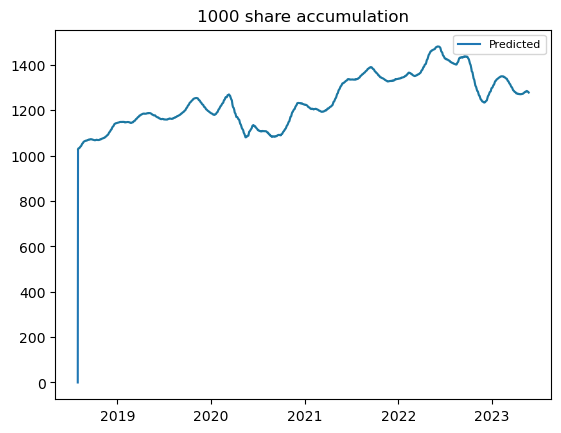

In [14]:
investment=1000

def get_cumulative(df,investment,title):
    df_returns=df['Open'].pct_change()
    df_returns_plus_one = df_returns.add(1)
    df_cumulative_return = df_returns_plus_one.cumprod()
    return df_cumulative_return.mul(investment)

def get_arima(df):
    result=get_cumulative(df,investment,"Accumulative")
    result=result.rolling(window=45).mean().dropna()
    mod = ARIMA(result, order=(1,1,1))
    results_ARIMA = mod.fit()
    # Plot the original series and the forecasted series
    #res.plot_predict(start=0, end=250)
    #res.resid.plot()
    plt.plot(result.index,results_ARIMA.fittedvalues,label='Predicted')
    plt.plot(result.index,result,c='green',alpha=0.1)
    plt.legend(fontsize=8)
    plt.title("1000 share accumulation")
    plt.show()
    
get_arima(all_df)
get_arima(bhp_df)
get_arima(lmt_df)
get_arima(exr_df)
get_arima(xom_df)
get_arima(duk_df)


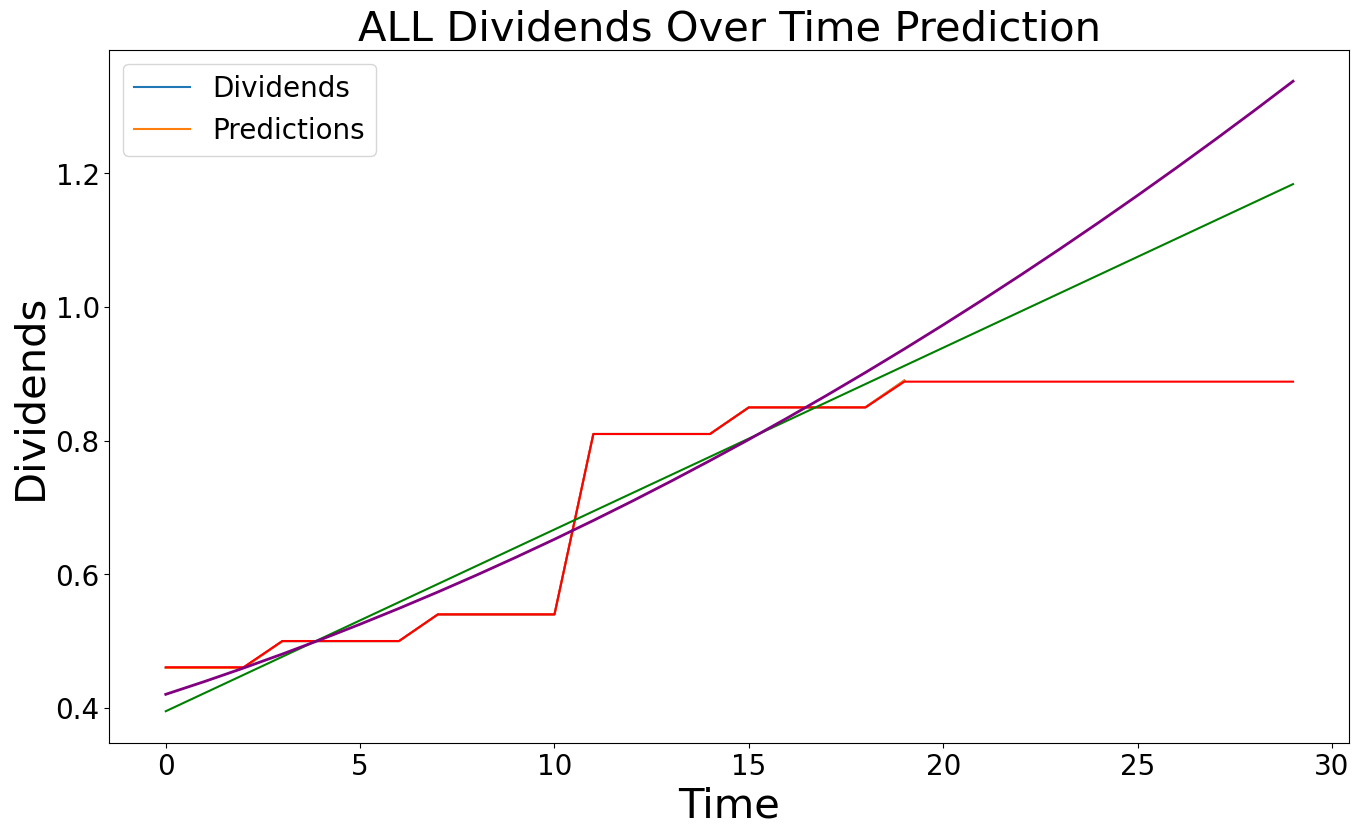

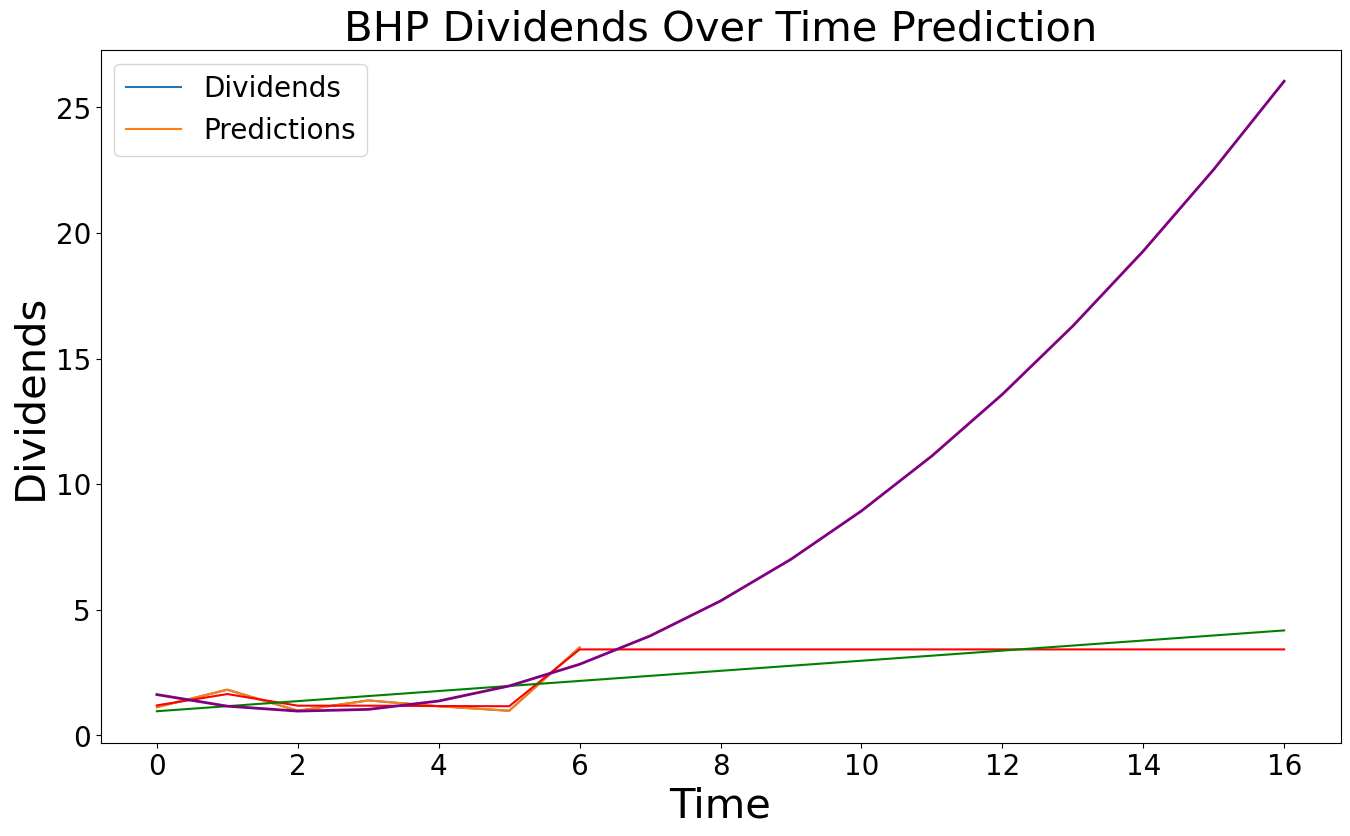

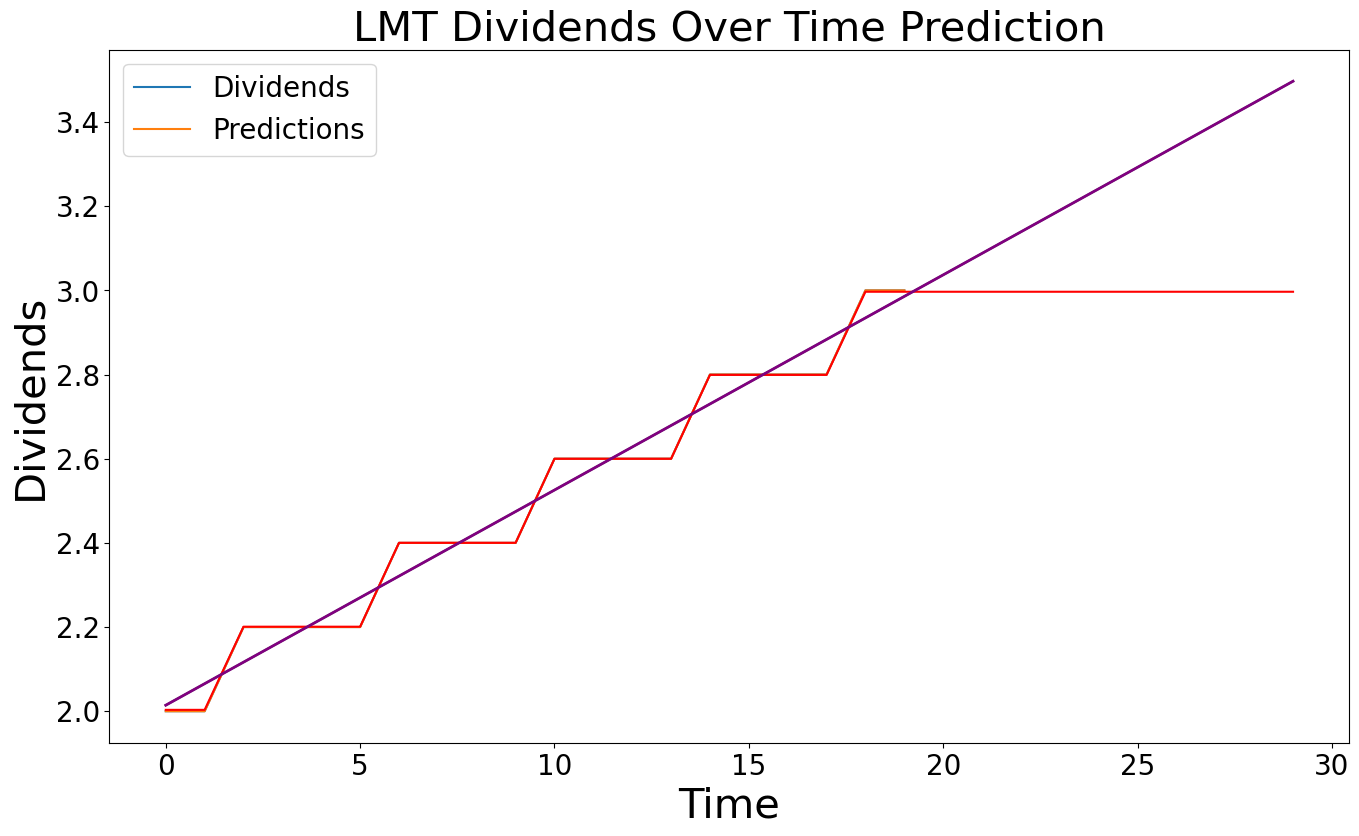

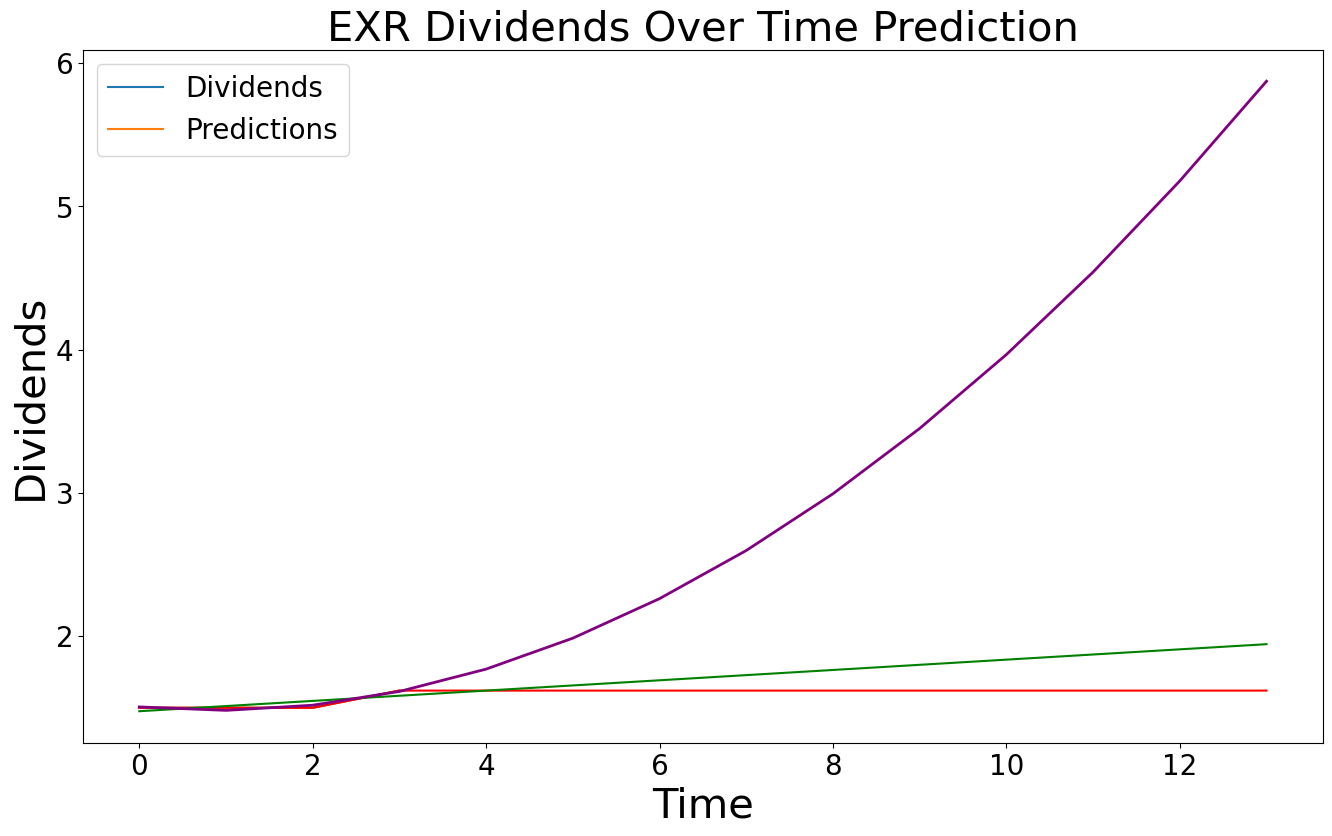

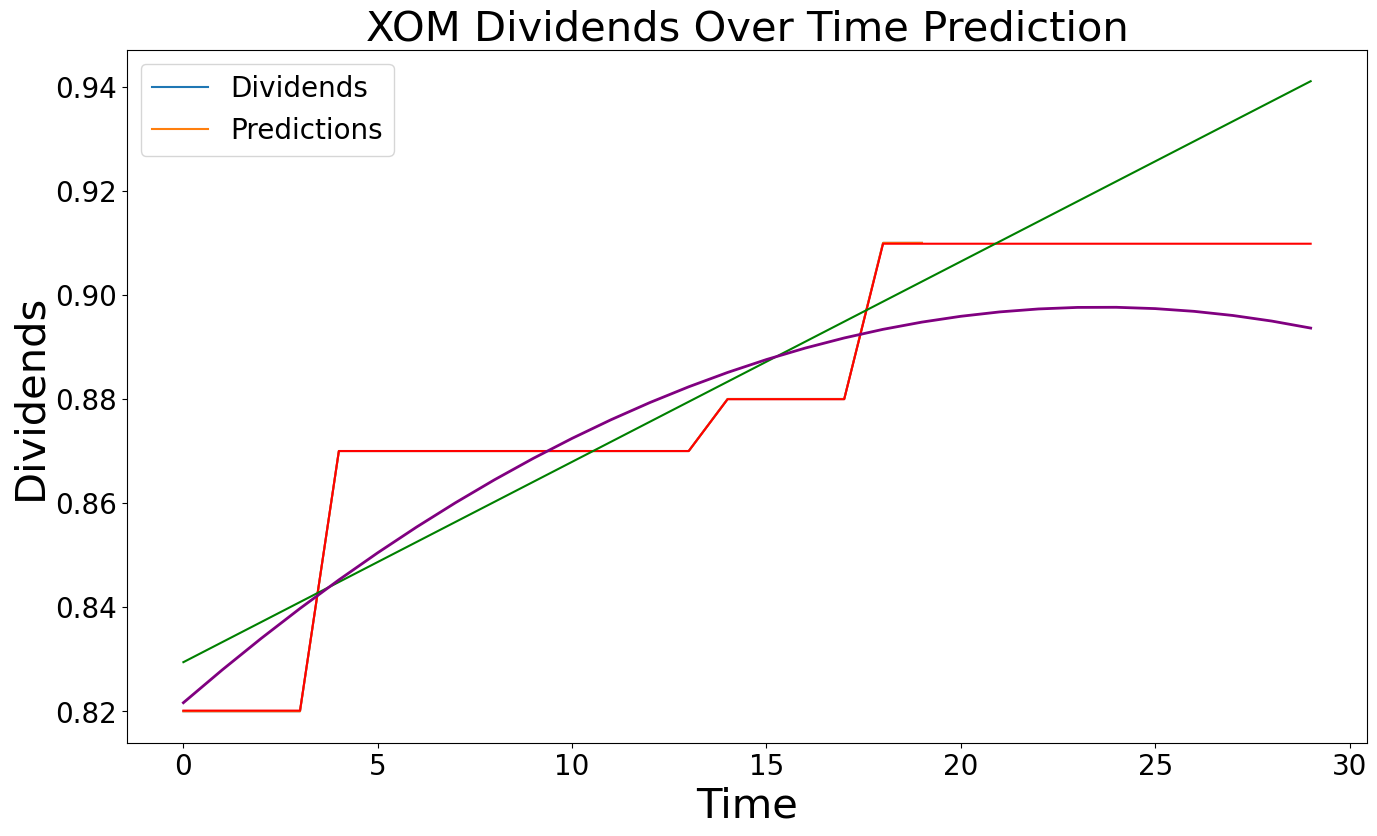

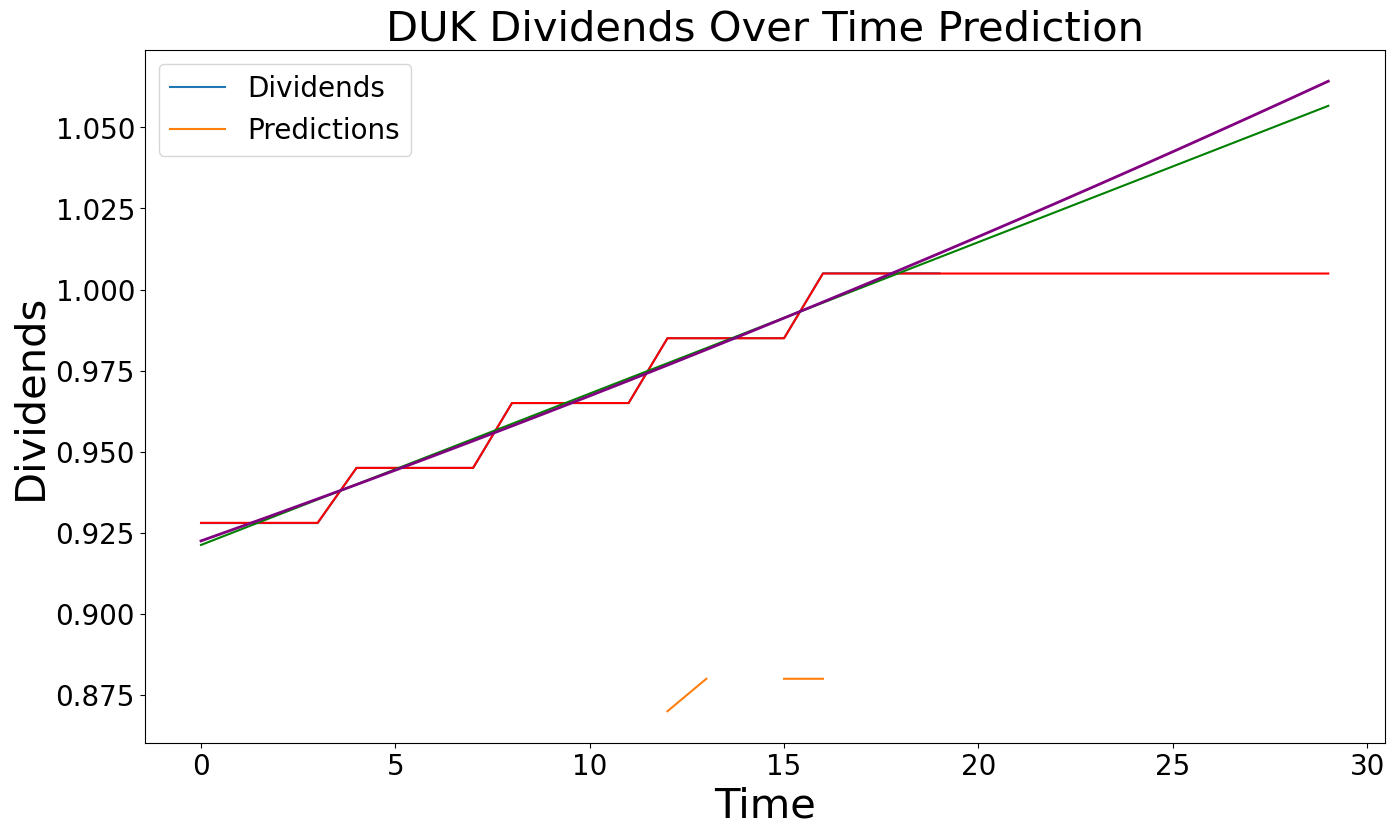

In [15]:
def func(params, x):
    a, b, c = params
    return a * x * x + b * x + c


# Error function, that is, the difference between the value obtained by fitting curve and the actual value
def error(params, x, y):
    return func(params, x) - y


def parabolicTrend(inputX,inputY):
    p0 = [10, 10, 10]
    Para = leastsq(error, p0, args=(inputX, inputY))
    return Para

def PlotPrediction(df,title):
    days_in_future = 10
    future_forecast = np.array([i for i in range(len(df)+days_in_future)]).reshape(-1, 1)
    adjusted_range = future_forecast[:-10]

    model = linear_model.LinearRegression()
    model.fit(adjusted_range, df['Dividends'])

    SEED=42
    gbt=GradientBoostingRegressor(n_estimators=100, max_depth=1, random_state=SEED)
    gbt.fit(adjusted_range, df['Dividends'])  

    Para = parabolicTrend(adjusted_range.flatten(),df['Dividends'].values)
    a, b, c = Para[0]
    x = future_forecast
    y = a * x * x + b * x + c # # function

    plt.figure(figsize=(16, 9))
    plt.plot(adjusted_range, df)
    plt.plot(future_forecast,gbt.predict(future_forecast),c="red") #gbtboostingregressor
    plt.plot(future_forecast,model.predict(future_forecast),c="green") #linear regressor
    plt.plot(x,y,color="purple",label="solution line",linewidth=2)

    plt.title(title, size=30)
    plt.xlabel('Time', size=30)
    plt.ylabel('Dividends', size=30)
    plt.legend(['Dividends', 'Predictions'], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
PlotPrediction(all_dividend_df,"ALL Dividends Over Time Prediction")    
PlotPrediction(bhp_dividend_df,"BHP Dividends Over Time Prediction")
PlotPrediction(lmt_dividend_df,"LMT Dividends Over Time Prediction")
PlotPrediction(exr_dividend_df,"EXR Dividends Over Time Prediction")
PlotPrediction(xom_dividend_df,"XOM Dividends Over Time Prediction")
PlotPrediction(duk_dividend_df,"DUK Dividends Over Time Prediction")

volatility is good if growth pct change is generally positive


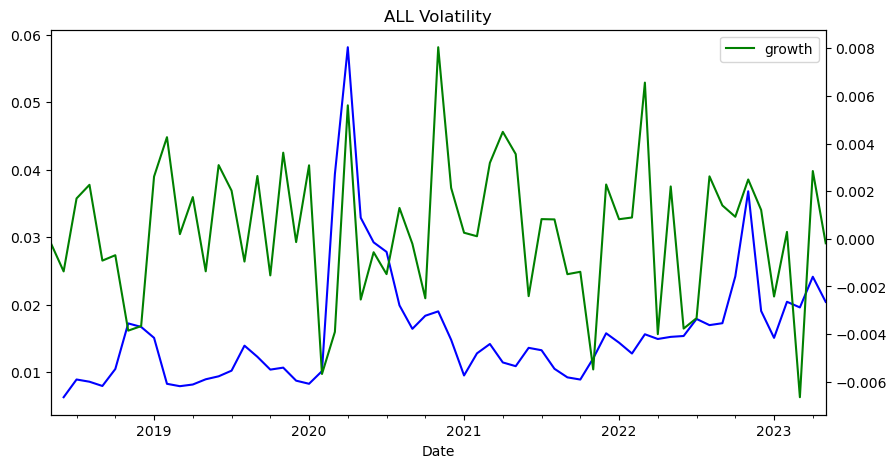

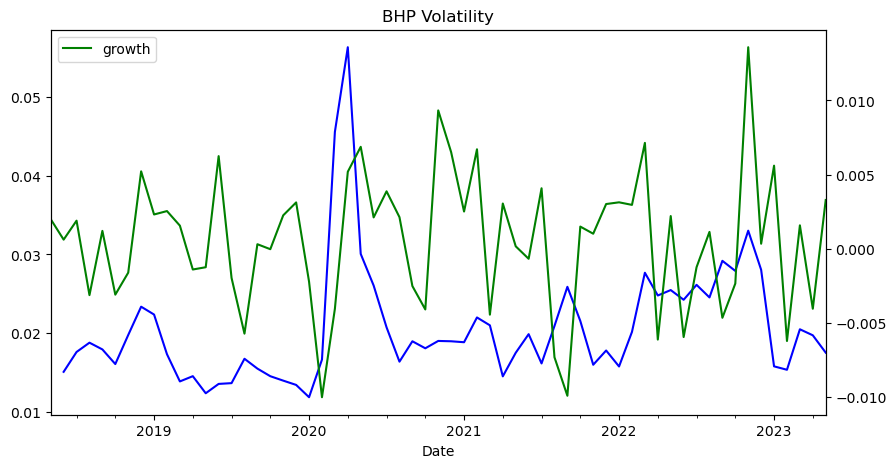

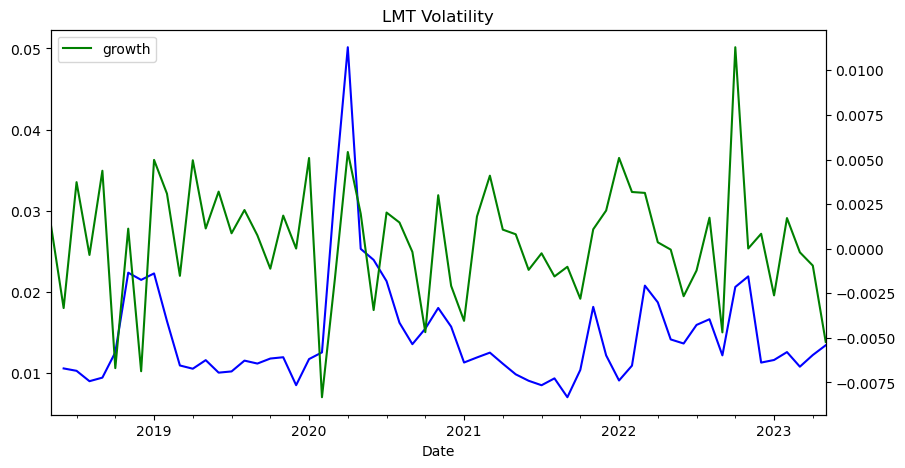

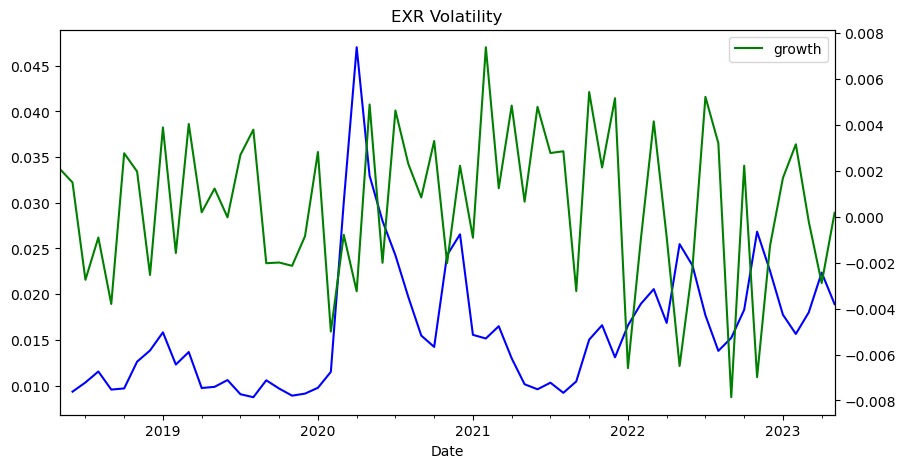

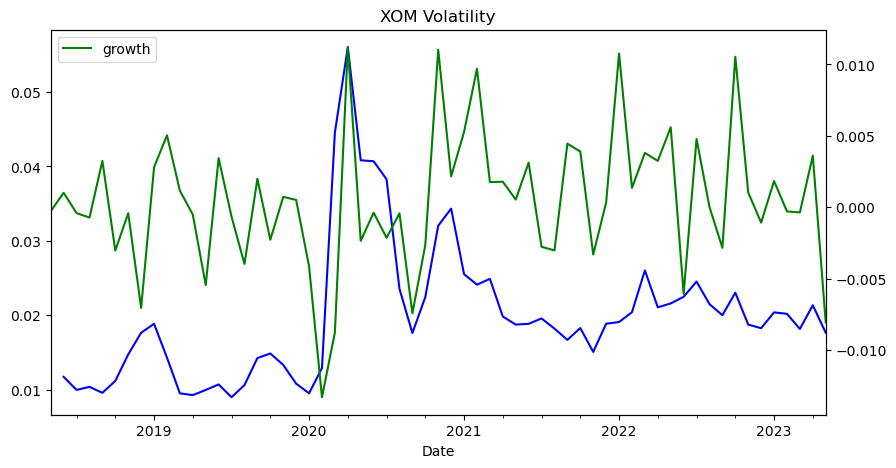

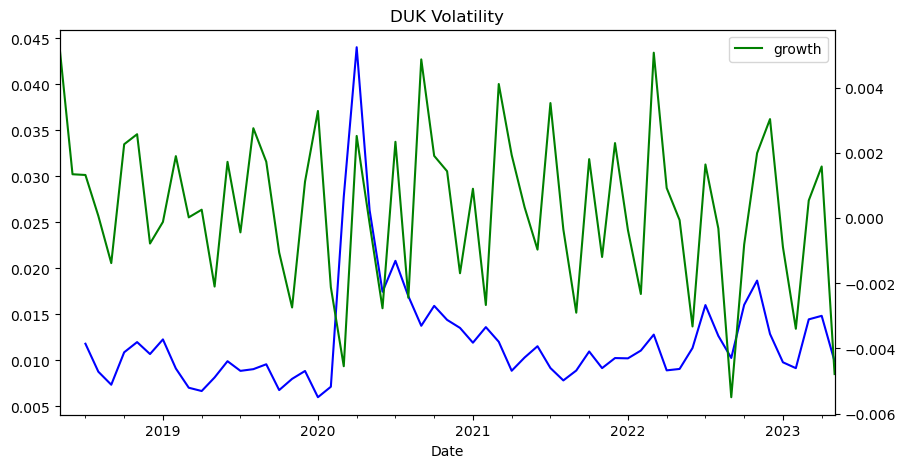

In [16]:
def PlotVolatility(ax,df,label,title):
    fig,ax = plt.subplots(figsize=(10,5))

    returns=df['Open'].pct_change()
    
    rolling=returns.rolling(30)
    volatility=rolling.std().dropna()

    vol_mean=volatility.resample('M').mean()
    growth=returns.resample('M').mean()

    vol_mean.plot(label="volatility",ax=ax,c='b')
    twin_ax=ax.twinx()
    growth.plot(label="growth",ax=twin_ax,c='g')

    plt.title(title)
    plt.legend()
    plt.show()
    #rolling=returns.rolling(30)
    #volatility=rolling.std().dropna()
    #volatility.plot(ax=ax,label=label)

print("volatility is good if growth pct change is generally positive")
PlotVolatility(ax,all_df,"ALL","ALL Volatility")
PlotVolatility(ax,bhp_df,"BHP","BHP Volatility")
PlotVolatility(ax,lmt_df,"LMT","LMT Volatility")
PlotVolatility(ax,exr_df,"EXR","EXR Volatility")
PlotVolatility(ax,xom_df,"XOM","XOM Volatility")
PlotVolatility(ax,duk_df,"DUK","DUK Volatility")

Accumulation on a 1000 shares


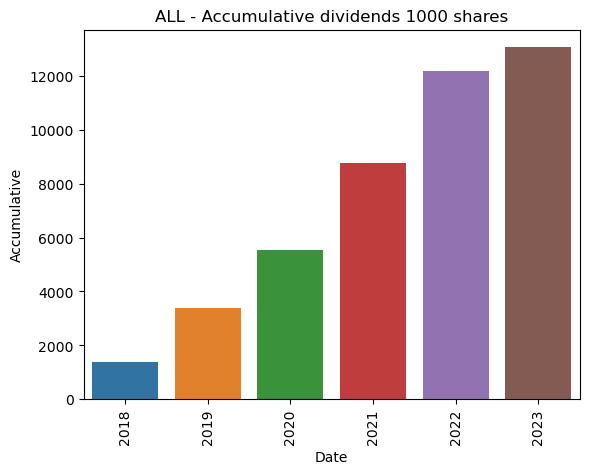

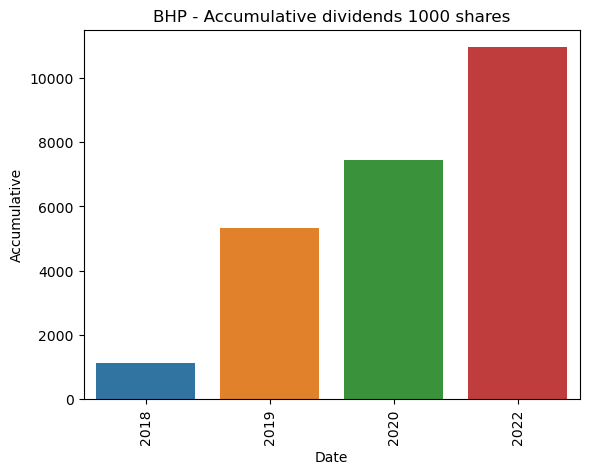

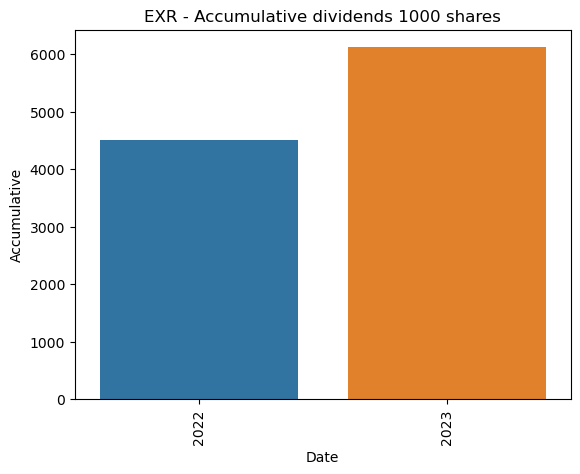

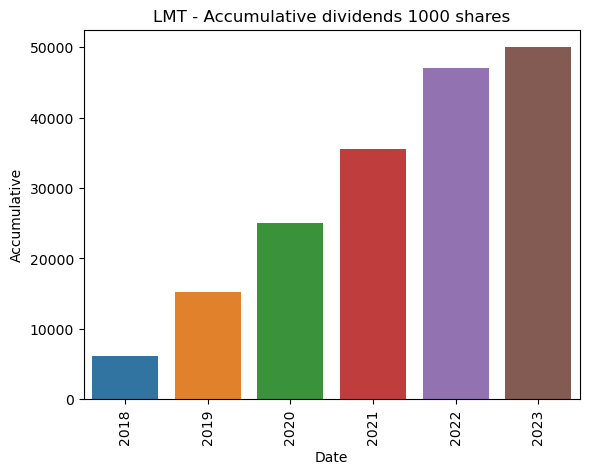

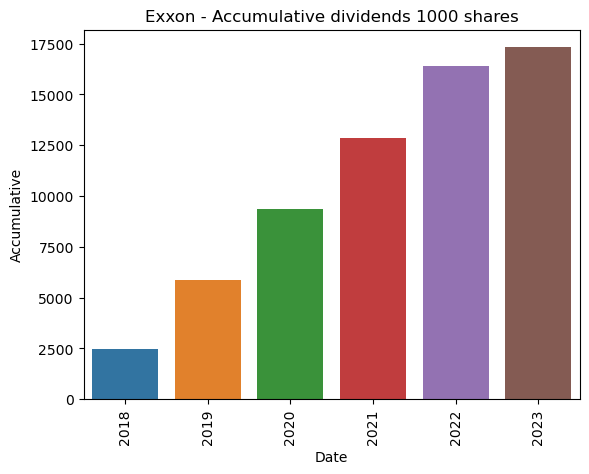

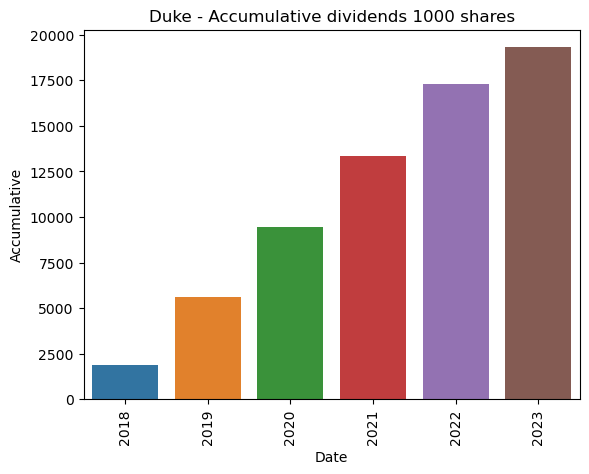

ALL Start of 5 Year Cost 94570.0 Cost today 115459.999 Avg Dividend Earning 2178.3333333333335  percent 1.886656289797243
BHP Start of 5 Year Cost 43050.846 Cost today 59349.998 Avg Dividend Earning 2739.407  percent 4.615681705667455
EXR Start of 5 Year Cost 93669.998 Cost today 151100.006 Avg Dividend Earning 3060.0  percent 2.025148827591708
LMT Start of 5 Year Cost 312230.011 Cost today 452690.002 Avg Dividend Earning 8333.333333333334  percent 1.840847665403782
XOM Start of 5 Year Cost 81180.0 Cost today 109739.998 Avg Dividend Earning 2886.6666666666665  percent 2.6304599227955756
DUK Start of 5 Year Cost 75739.998 Cost today 90989.998 Avg Dividend Earning 3218.6666666666665  percent 3.5373851383826453


In [17]:
print("Accumulation on a 1000 shares")
shares=1000

def AccumulativeEarnings(investment,df,title):
    df['Accum_Earnings']=df['Dividends'].apply(lambda x: x*investment)
    months=df.index.month
    years=df.index.year
    grouped=df.groupby([years,months])['Accum_Earnings'].sum()
    grouped=grouped.unstack()

    fp=df.pivot_table(index=df.index.year,columns=df.index.month,values=['Accum_Earnings'],aggfunc='sum')
    fp['Totals'] = fp.sum(axis='columns')
    fp['Accumulative']=fp['Totals'].cumsum()

    sns.barplot(x=fp.index,y=fp['Accumulative'])
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    return fp

shares=1000


accum_all_dividend=AccumulativeEarnings(shares,all_dividend_df,"ALL - Accumulative dividends 1000 shares")
accum_bhp_dividend=AccumulativeEarnings(shares,bhp_dividend_df,"BHP - Accumulative dividends 1000 shares")
accum_exr_dividend=AccumulativeEarnings(shares,exr_dividend_df,"EXR - Accumulative dividends 1000 shares")
accum_lmt_dividend=AccumulativeEarnings(shares,lmt_dividend_df,"LMT - Accumulative dividends 1000 shares")
accum_xom_dividend=AccumulativeEarnings(shares,xom_dividend_df,"Exxon - Accumulative dividends 1000 shares")
accum_duk_dividend=AccumulativeEarnings(shares,duk_dividend_df,"Duke - Accumulative dividends 1000 shares")

lst=[(accum_all_dividend,all_df,"ALL"),(accum_bhp_dividend,bhp_df,"BHP"),(accum_exr_dividend,exr_df,"EXR"),
     (accum_lmt_dividend,lmt_df,"LMT"),(accum_xom_dividend,xom_df,"XOM"),(accum_duk_dividend,duk_df,"DUK")]
def ShowCostAndEarnings(lst):
    for accum_dividend_df,price_df,label in lst:
        earning=float(accum_dividend_df['Accumulative'].iloc[-1])/len(accum_dividend_df)
        beginning_cost=price_df['Open'].iloc[0]*shares
        cost_today=price_df['Open'].iloc[len(price_df)-1]*shares
        percent=float(earning)/float(cost_today)*100
        print("{label} Start of 5 Year Cost {beginning_cost} Cost today {cost_today} Avg Dividend Earning {earning}  percent {percent}".format(label=label,beginning_cost=beginning_cost,cost_today=cost_today,earning=earning,percent=percent))
        

ShowCostAndEarnings(lst)